       fixed acidity  volatile acidity  citric acid  residual sugar   
count    1599.000000       1599.000000  1599.000000     1599.000000  \
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density   
count  1599.000000          1599.000000           1599.000000  1599.000000  \
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397






the best predictor is alcohol
alcohol  m value is:  0.47616632400113656




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.031416,-0.079851,0.227820,0.281756,0.007679,-2.800921,-6.482346,0.002195,-0.183586,0.054010,-0.114421,0.174424
volatile acidity,-0.079851,0.032062,-0.019272,0.000484,0.000517,-0.019674,0.450426,0.000007,0.006495,-0.007921,-0.038600,-0.056476
citric acid,0.227820,-0.019272,0.037947,0.039434,0.001869,-0.124252,0.227697,0.000134,-0.016298,0.010328,0.022815,0.035612
residual sugar,0.281756,0.000484,0.039434,1.987897,0.003690,2.758611,9.416441,0.000945,-0.018644,0.001321,0.063219,0.015635
chlorides,0.007679,0.000517,0.001869,0.003690,0.002215,0.002738,0.073387,0.000018,-0.001926,0.002962,-0.011092,-0.004900
free sulfur dioxide,-2.800921,-0.019674,-0.124252,2.758611,0.002738,109.414884,229.737521,-0.000433,0.113653,0.091592,-0.773698,-0.427907
total sulfur dioxide,-6.482346,0.450426,0.227697,9.416441,0.073387,229.737521,1082.102373,0.004425,-0.337699,0.239471,-7.209298,-4.917237
density,0.002195,0.000007,0.000134,0.000945,0.000018,-0.000433,0.004425,0.000004,-0.000100,0.000048,-0.000998,-0.000267
pH,-0.183586,0.006495,-0.016298,-0.018644,-0.001926,0.113653,-0.337699,-0.000100,0.023835,-0.005146,0.033832,-0.007198
sulphates,0.054010,-0.007921,0.010328,0.001321,0.002962,0.091592,0.239471,0.000048,-0.005146,0.028733,0.016907,0.034413


the highest covariance for each variable is: 
  fixed acidity                  fixed acidity
volatile acidity        total sulfur dioxide
citric acid                    fixed acidity
residual sugar          total sulfur dioxide
chlorides               total sulfur dioxide
free sulfur dioxide     total sulfur dioxide
total sulfur dioxide    total sulfur dioxide
density                 total sulfur dioxide
pH                       free sulfur dioxide
sulphates               total sulfur dioxide
alcohol                              alcohol
quality                              quality
dtype: object










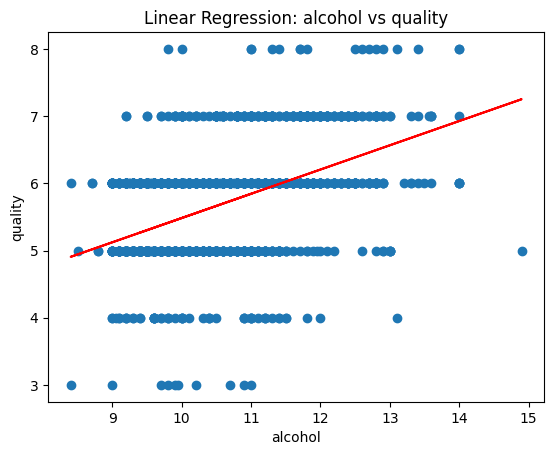

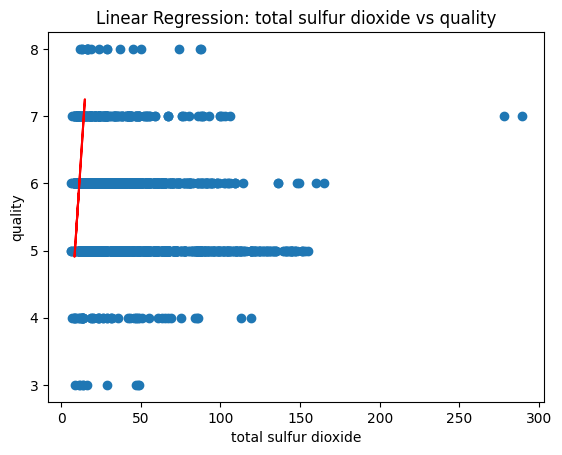

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv("wine.csv")
x = data["alcohol"].values.reshape(-1, 1)  # Reshape x to a 2D array
y = data["quality"]

x2 = data["total sulfur dioxide"].values.reshape(-1, 1)  # Reshape x to a 2D array

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Generate predictions from the fitted model
y_pred = model.predict(x)

# Plot the scatter plot and linear regression line
print(data.describe())

summary_stats = data.describe()

# Compute correlation matrix
correlation_matrix = data.corr()
covariance_matrix = data.cov()

corr_matrix_styled = correlation_matrix.style.background_gradient(cmap='coolwarm')
corr_matrix_styled.set_properties(**{'font-size': '9pt'})  # Set font size for better readability
display(corr_matrix_styled)


# Find variable with highest correlation with quality
quality_correlations = correlation_matrix["quality"].drop("quality")
best_predictor = quality_correlations.abs().idxmax()
correlation_value = quality_correlations[best_predictor]
print("\n")
print("\n")
print("the best predictor is", best_predictor)
print(best_predictor," m value is: ", quality_correlations.abs().max())
print("\n")


cov_matrix = data.cov()

# Display covariance matrix aesthetically
cov_matrix_styled = cov_matrix.style.background_gradient(cmap='coolwarm')
cov_matrix_styled.set_properties(**{'font-size': '9pt'})  # Set font size for better readability

# Display the styled covariance matrix
display(cov_matrix_styled)

print("the highest covariance for each variable is: \n ", covariance_matrix.idxmax())
print("\n")
print("\n")
print("\n")
print("\n")


plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel("alcohol")
plt.ylabel("quality")
plt.title("Linear Regression: alcohol vs quality")
plt.show()

plt.scatter(x2, y)
plt.plot(x, y_pred, color='red')
plt.xlabel("total sulfur dioxide")
plt.ylabel("quality")
plt.title("Linear Regression: total sulfur dioxide vs quality")
plt.show()